# Statsmodel

statsmodel is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.

In [1]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 14.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Simple Linear Model

In [3]:
climate = pd.read_csv('/Users/choihangyul/Desktop/ML_Work/climate_change.csv')
climate

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06
...,...,...,...
701,2016-08-06,402.27,0.98
702,2016-09-06,401.05,0.87
703,2016-10-06,401.59,0.89
704,2016-11-06,403.55,0.93


In [4]:
climate.isnull().sum()

date             0
co2              7
relative_temp    0
dtype: int64

In [5]:
climate.dropna(inplace=True)
climate

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
4,1958-07-06,315.86,0.06
5,1958-08-06,314.93,-0.06
...,...,...,...
701,2016-08-06,402.27,0.98
702,2016-09-06,401.05,0.87
703,2016-10-06,401.59,0.89
704,2016-11-06,403.55,0.93


In [6]:
x = climate['co2']
x_add = sm.add_constant(x, prepend=False)

y = climate['relative_temp']

In [7]:
model1 = sm.OLS(y, x_add)

result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          relative_temp   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2622.
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          2.13e-238
Time:                        19:25:02   Log-Likelihood:                 386.61
No. Observations:                 699   AIC:                            -769.2
Df Residuals:                     697   BIC:                            -760.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co2            0.0103      0.000     51.205      0.0

## 회귀가정 진단

1. 선형성: x와 y가 선형관계를 보이는가? 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


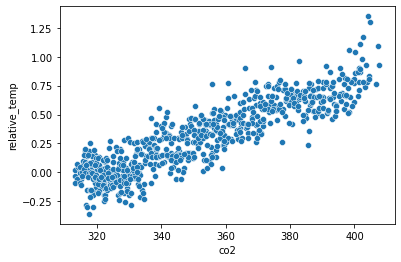

In [8]:
sns.scatterplot(x,y)
plt.show()

2. 독립성: 다중회귀에 해당. 독립변수 x는 서로 독립적이어야 함


독립변수가 하나인 simple linear regression이므로 skip

3. 잔차의 등분산성

일반 잔차는 .resid   
표준화 잔차는 influence.resid_studentized_internal

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


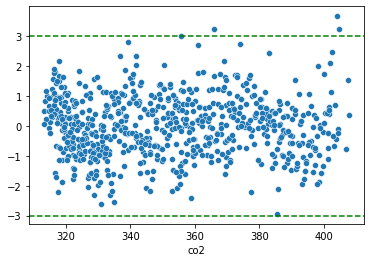

In [9]:
influence1 = result1.get_influence()
s_residual = influence1.resid_studentized_internal
sns.scatterplot(x, s_residual)
plt.axhline(3, c='g', ls='--')
plt.axhline(-3, c='g', ls='--')
plt.show()

4. 잔차의 정규성: 잔차의 분포가 정규분포를 따른다.    
-> Q-Q plot과 Shapiro test

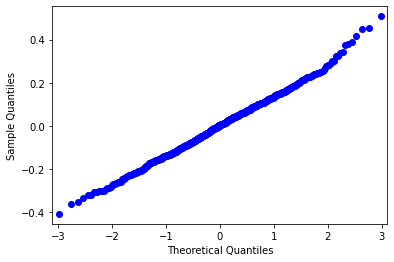

In [10]:
fig = sm.qqplot(result1.resid)
plt.show()

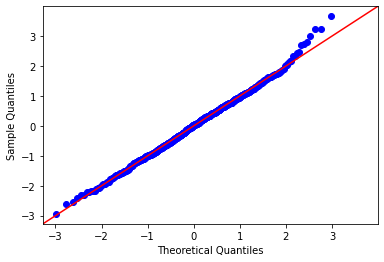

In [11]:
fig = sm.qqplot(s_residual, line='45')
plt.show()

In [14]:
from scipy import stats

shapiro_test = stats.shapiro(s_residual)
shapiro_test

(0.9971144199371338, 0.2525595426559448)

5. 잔차의 독립성: 잔차는 서로 연관성이 없이 독립적이어야 한다.   
-> Durbin-watson test

In [15]:
from statsmodels.stats.stattools import durbin_watson

d1 = durbin_watson(s_residual)
d1

0.778413786262462

# 2. Multiple Linear Regression

In [16]:
mpg = pd.read_csv('/Users/choihangyul/Desktop/ML_Work/mpg.csv')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [17]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [18]:
mpg.dropna(inplace=True)
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [19]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [20]:
x2 = mpg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year' ]]
y2 = mpg[['mpg']]

In [22]:
x_add2 = sm.add_constant(x2, prepend=False)
x_add2

,cylinders,displacement,horsepower,weight,acceleration,model_year,const
0,8,307.0,130.0,3504,12.0,70,1.0
1,8,350.0,165.0,3693,11.5,70,1.0
2,8,318.0,150.0,3436,11.0,70,1.0
3,8,304.0,150.0,3433,12.0,70,1.0
4,8,302.0,140.0,3449,10.5,70,1.0
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1.0
394,4,97.0,52.0,2130,24.6,82,1.0
395,4,135.0,84.0,2295,11.6,82,1.0
396,4,120.0,79.0,2625,18.6,82,1.0


In [23]:
model2 = sm.OLS(y2, x_add2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          3.79e-135
Time:                        19:39:28   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.3299      0.332     -0.993   

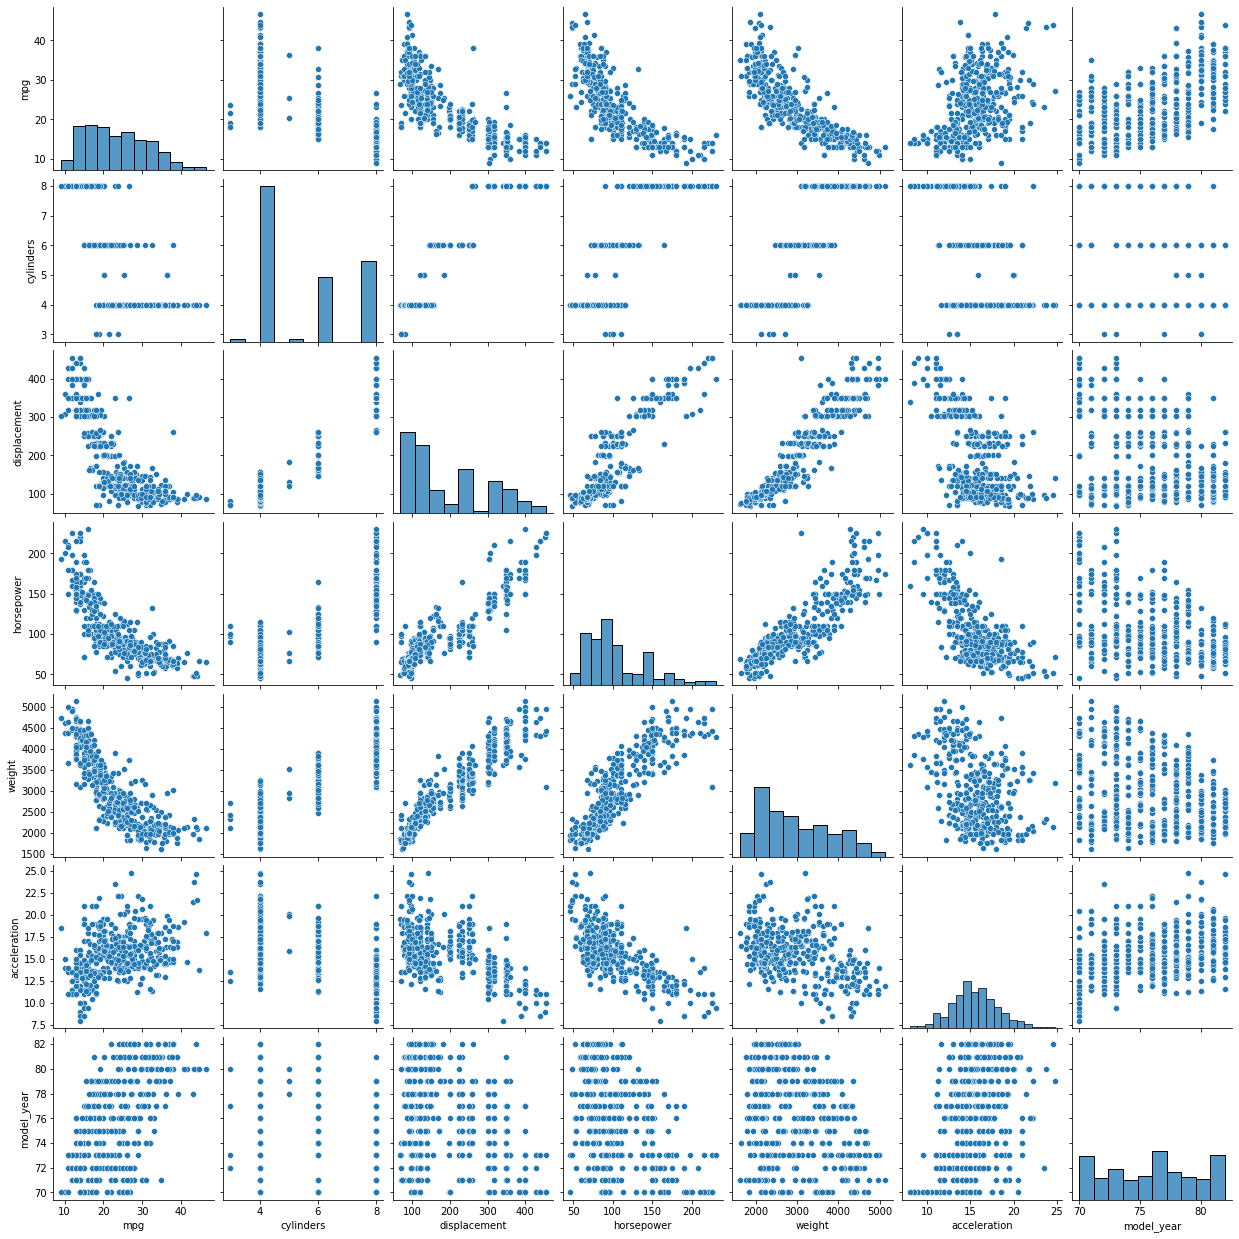

In [24]:
sns.pairplot(mpg)
plt.show()

2. 독립성: 다중회귀에 해당. 독립변수 x는 서로 독립적이어야 함.   
-> 독립변수들만을 이용한 pairplot 혹은 VIF를 통해 알 수 있음.

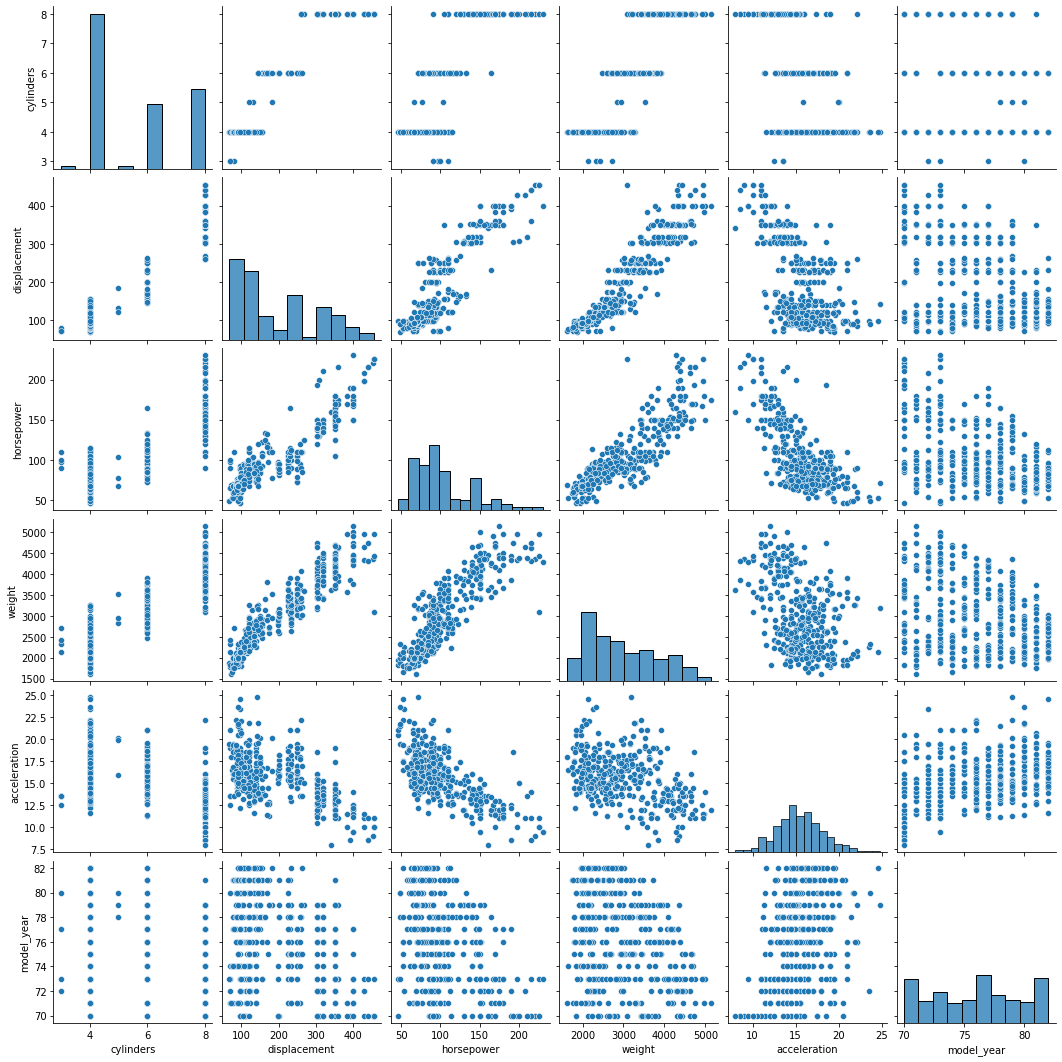

In [25]:
sns.pairplot(x2)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중 공산성
vif_df = pd.DataFrame({'x': column, 'VIF': variance_inflation_factor(model2.exog, i)}
                     for i, column in enumerate(model2.exog_names)
                     if column != 'Intercept')
vif_df

,x,VIF
0,cylinders,10.633049
1,displacement,19.641683
2,horsepower,9.398043
3,weight,10.731681
4,acceleration,2.625581
5,model_year,1.244829
6,const,753.863747


3. 잔차의 등분산성

일반 잔차는 .resid    
표준화 잔차는 influence.resid_studentized_internal

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


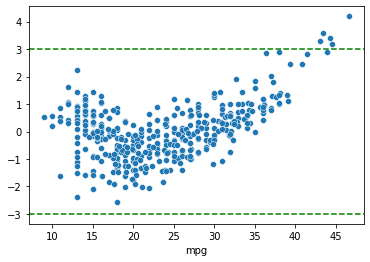

In [31]:
influence2 = result2.get_influence()
influence2 = result2.get_influence()
s_residual2 = influence2.resid_studentized_internal
sns.scatterplot(y2['mpg'], s_residual2)
plt.axhline(3, c='g', ls='--')
plt.axhline(-3, c='g', ls='--')
plt.show()

4. 잔차의 정규성: 잔차의 분포가 정규분포를 따른다.   
-> Q-Q plot과 Shapiro test

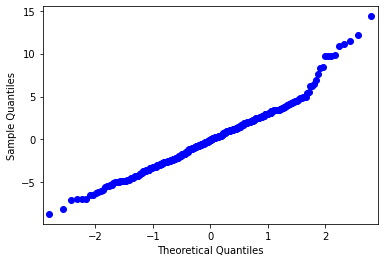

In [33]:
fig = sm.qqplot(result2.resid)
plt.show()

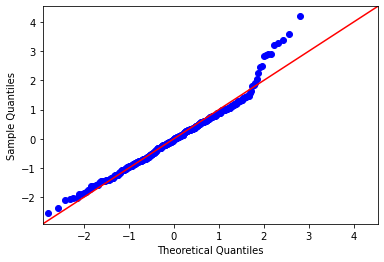

In [34]:
fig = sm.qqplot(s_residual2, line='45')
plt.show()

In [35]:
from scipy import stats

shapiro_test = stats.shapiro(s_residual2)
shapiro_test

(0.9726482629776001, 9.856715905698366e-07)

In [37]:
print('%.5f' % (9.856715905698366e-07))

0.00000


5. 잔차의 독립성: 잔차는 서로 연관성이 없이 독립적이어야 한다.    
-> Durbin-watson test

In [38]:
from statsmodels.stats.stattools import durbin_watson

d2 = durbin_watson(s_residual2)
d2

1.2342171040757672